In [1]:
import tensorflow as tf

In [2]:
print(tf.__version__)

2.4.1


In [3]:
tf.test.gpu_device_name()

'/device:GPU:0'

In [4]:
model_predi = tf.keras.models.load_model('covid-19_cnn.model_r')


In [5]:
import pickle
X=pickle.load(open('X.pickle','rb'))

y=pickle.load(open('y.pickle','rb'))

In [6]:
print(X.shape)
print(y.shape)

(2822, 224, 224, 3)
(2822,)


In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y, random_state=42)

In [8]:
from collections import Counter
y_dist_train = Counter(y_train)
y_dist_test = Counter(y_test)

print(y_train.shape)
print(y_test.shape)
print (y_dist_train)
print(y_dist_test)

(2257,)
(565,)
Counter({0: 1261, 1: 629, 2: 367})
Counter({0: 315, 1: 158, 2: 92})


In [9]:
import numpy as np
result_3class=['NORMAL','PNEUMONIA', 'COVID-19']
result_3class=np.array(result_3class)
from sklearn.metrics import classification_report
prediction = model_predi.predict(X_test)
prediction=np.argmax(prediction,axis=1)
print(classification_report(y_test, prediction,target_names=result_3class))

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
              precision    recall  f1-score   support

      NORMAL       0.93      0.98      0.95       315
   PNEUMONIA       0.95      0.85      0.90       158
    COVID-19       0.99      0.97      0.98        92

    accuracy                           0.94       565
   macro avg       0.95      0.93      0.94       565
weighted avg       0.94      0.94      0.94       56

In [10]:
from sklearn.metrics import confusion_matrix
cm_r=confusion_matrix(y_test, prediction)

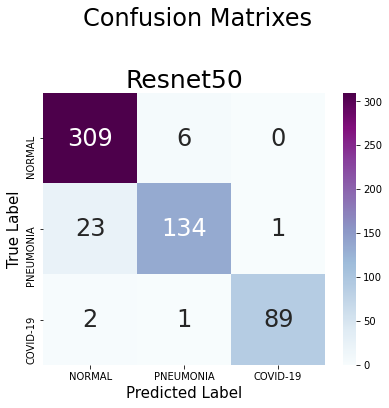

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(24,12))

plt.suptitle("Confusion Matrixes",fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(2,3,2)
plt.title("Resnet50",size=25)
plt.gcf().axes[0].tick_params()
ax=sns.heatmap(cm_r,annot=True,cmap="BuPu",fmt="d",xticklabels=result_3class,yticklabels=result_3class, annot_kws={"size": 24})
cbar = ax.collections[0].colorbar
cbar.ax.tick_params()
plt.ylabel("True Label",size=15)
plt.xlabel("Predicted Label",size=15)
plt.show()

In [13]:
y_test[:100]

array([2, 0, 2, 0, 0, 1, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 2, 2, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       2, 1, 0, 0, 0, 2, 1, 1, 2, 1, 0, 2, 0, 0, 1, 2, 0, 0, 1, 1, 2, 0,
       2, 1, 1, 0, 1, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 1, 2,
       0, 0, 0, 2, 1, 0, 1, 0, 0, 0, 1, 0])

In [14]:
prediction[:100]

array([2, 0, 2, 0, 0, 1, 2, 0, 1, 0, 2, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 2, 2, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       2, 1, 0, 0, 0, 2, 0, 0, 2, 1, 0, 2, 0, 0, 1, 2, 0, 0, 1, 1, 2, 0,
       2, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 1, 0, 1, 2,
       0, 0, 0, 2, 1, 0, 1, 0, 0, 0, 1, 0], dtype=int64)

In [15]:
len(y_test)

565

In [16]:
for i in range(len(y_test)):
    if y_test[i] != prediction[i]:
        print('prediction',i,'=', prediction[i])
        

prediction 8 = 1
prediction 24 = 0
prediction 50 = 0
prediction 51 = 0
prediction 67 = 0
prediction 70 = 0
prediction 84 = 1
prediction 146 = 1
prediction 207 = 1
prediction 217 = 0
prediction 221 = 0
prediction 269 = 0
prediction 281 = 0
prediction 285 = 0
prediction 305 = 0
prediction 339 = 0
prediction 343 = 0
prediction 347 = 0
prediction 355 = 2
prediction 378 = 0
prediction 379 = 0
prediction 395 = 0
prediction 399 = 0
prediction 429 = 0
prediction 437 = 0
prediction 452 = 0
prediction 471 = 0
prediction 494 = 0
prediction 505 = 1
prediction 520 = 1
prediction 535 = 0
prediction 539 = 1
prediction 551 = 0


In [17]:
for i in range(len(y_test)):
    if y_test[i] != prediction[i]:
        print('y_test',i,'=', y_test[i])

y_test 8 = 0
y_test 24 = 1
y_test 50 = 1
y_test 51 = 1
y_test 67 = 1
y_test 70 = 1
y_test 84 = 0
y_test 146 = 2
y_test 207 = 0
y_test 217 = 1
y_test 221 = 1
y_test 269 = 1
y_test 281 = 1
y_test 285 = 1
y_test 305 = 1
y_test 339 = 1
y_test 343 = 1
y_test 347 = 1
y_test 355 = 1
y_test 378 = 1
y_test 379 = 2
y_test 395 = 1
y_test 399 = 2
y_test 429 = 1
y_test 437 = 1
y_test 452 = 1
y_test 471 = 1
y_test 494 = 1
y_test 505 = 0
y_test 520 = 0
y_test 535 = 1
y_test 539 = 0
y_test 551 = 1


In [18]:
label = list(map(str,y_test))
#label[0] 

for i in range(len(label)):
    if label[i]=='0':
        label[i]='NORMAL'
    if label[i]=='1':
        label[i]='PNEUMONIA'
    if label[i]=='2':
       label[i]='COVID-19' 
        
#label      

In [19]:
label_p = list(map(str,prediction))
#label[0] 

for i in range(len(label_p)):
    if label_p[i]=='0':
        label_p[i]='NORMAL'
    if label_p[i]=='1':
        label_p[i]='PNEUMONIA'
    if label_p[i]=='2':
        label_p[i]='COVID-19' 
        
#label_p    

In [23]:
# Model result is COVID-19
for i in range(len(y_test)):
    if y_test[i] != prediction[i]:
        if prediction[i] == 2:
            print('prediction',i,'=', prediction[i])
            print('y_test',i,'=',y_test[i])
            print("")
        

prediction 355 = 2
y_test 355 = 1



In [24]:
# Actual X-Ray film is COVID-19

for i in range(len(y_test)):
    if y_test[i] != prediction[i]:
        if y_test[i] == 2:
            print('y_test',i,'=', y_test[i])
            print('prediction',i,'=',prediction[i])
            print("")
        

y_test 146 = 2
prediction 146 = 1

y_test 379 = 2
prediction 379 = 0

y_test 399 = 2
prediction 399 = 0



# Model result is COVID-19

(-0.5, 223.5, 223.5, -0.5)

<Figure size 720x720 with 0 Axes>

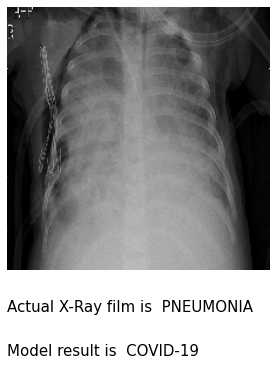

In [26]:
plt.figure(figsize=(10,10))
fig, ax = plt.subplots(figsize = (16, 16))

n=355
plt.subplot(1,3,1)
plt.imshow(X_test[n])
plt.text(0, 0.3,"Actual X-Ray film is  {0}".format(label[n]) ,transform=ax.transAxes,size=15)
plt.text(0, 0.25,"Model result is  {0}".format(label_p[n]) ,transform=ax.transAxes,size=15)
plt.axis('off')


    
    

# Actual X-Ray film is COVID-19

(-0.5, 223.5, 223.5, -0.5)

<Figure size 720x720 with 0 Axes>

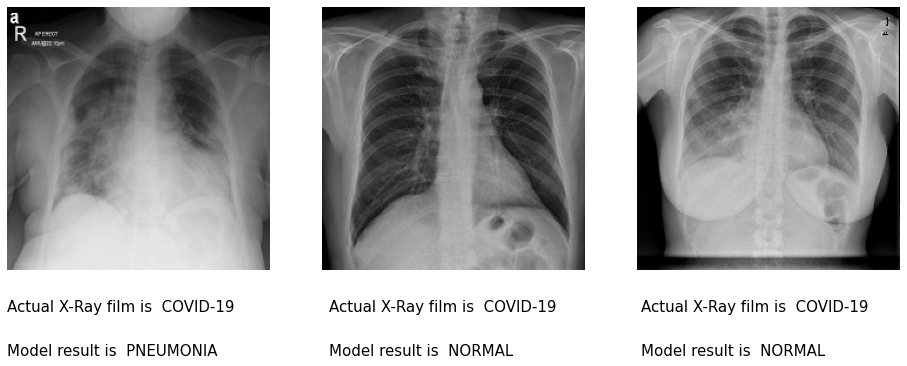

In [30]:
plt.figure(figsize=(10,10))
fig, ax = plt.subplots(figsize = (16, 16))

n=146
plt.subplot(1,3,1)
plt.imshow(X_test[n])
plt.text(0, 0.3,"Actual X-Ray film is  {0}".format(label[n]) ,transform=ax.transAxes,size=15)
plt.text(0, 0.25,"Model result is  {0}".format(label_p[n]) ,transform=ax.transAxes,size=15)
plt.axis('off')

n=379
plt.subplot(1,3,2)
plt.imshow(X_test[n])
plt.text(0.36, 0.3,"Actual X-Ray film is  {0}".format(label[n]) ,transform=ax.transAxes,size=15)
plt.text(0.36, 0.25,"Model result is  {0}".format(label_p[n]) ,transform=ax.transAxes,size=15)
plt.axis('off')


n=399
plt.subplot(1,3,3)
plt.imshow(X_test[n])
plt.text(0.71, 0.3,"Actual X-Ray film is  {0}".format(label[n]) ,transform=ax.transAxes,size=15)
plt.text(0.71, 0.25,"Model result is  {0}".format(label_p[n]) ,transform=ax.transAxes,size=15)
plt.axis('off')